In [1]:
import numpy as np

**Problem 1**

a. There are 5 features in $x_1$ and 4 features in $x_2$.

b. For $x_1$:

In [2]:
x1 = np.array([2, 3, 4, 8, 9])
L1 = np.sum(x1)

L2 = np.square(x1)
L2 = np.sum(L2)
L2 = np.sqrt(L2)

Linf = np.max(x1)

print('L1 =', L1)
print('L2 =', L2)
print('Linf =', Linf)

L1 = 26
L2 = 13.19090595827292
Linf = 9


For $x_2$:

In [3]:
x2 = np.array([2, -3, -4, 89])
x2 = np.abs(x2)
L1 = np.sum(x2)

L2 = np.square(x2)
L2 = np.sum(L2)
L2 = np.sqrt(L2)

Linf = np.max(x2)

print('L1 =', L1)
print('L2 =', L2)
print('Linf =', Linf)

L1 = 98
L2 = 89.16277250063504
Linf = 89


**Problem 2**



a. Length of feature vector: $1024*1024*3=3145728$

b.Length of output vector:
$64*64*3=12288$

c. The matrix $W$ is of size 12288 x 3145728, while the vector $b$ is the same size as the output vector, 12288

**Problem 3**

Calculate the 1-norm, 2-norm, inf-norm, and Frobenius norm.

In [4]:
W = np.array([[1, -1],[2, 0]])
norm1 = np.abs(W)
norm1 = np.sum(norm1, axis=0) #sum up each column
norm1 = np.max(norm1)
print('1-norm =',norm1)

Wt = np.transpose(W)
eigs = np.linalg.eigvals(np.matmul(Wt,W))
norm2 = np.sqrt(np.max(eigs))
#can also just use --> norm2 = np.linalg.norm(W, ord=2)
print('2-norm =',norm2)

norminf = np.abs(W)
norminf = np.sum(norminf, axis=1) #sum up each column
norminf = np.max(norminf)
print('inf-norm =',norminf)

normf = np.abs(W)
normf = np.square(normf)
normf = np.sum(normf)
normf = np.sqrt(normf)
print('Frobenius norm =',normf)



1-norm = 3
2-norm = 2.288245611270737
inf-norm = 2
Frobenius norm = 2.449489742783178


**Problem 4**



Text(0, 0.5, 'sepal width (cm)')

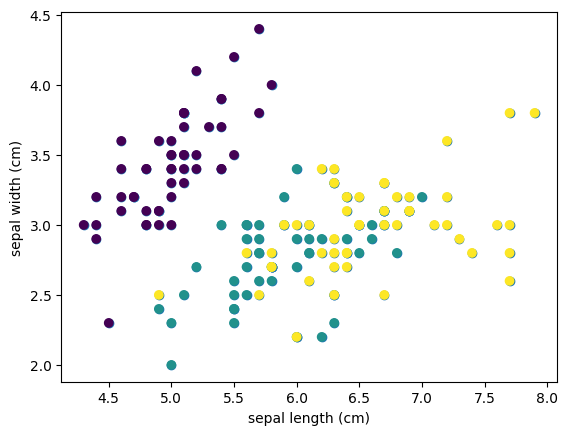

In [5]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

%notebook inline
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plot = plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# plt.legend(handles=plot.legend_elements()[0], labels=iris.target_names.tolist())

Only selecting the first 3 features

In [6]:
X = iris.data[:, :3] # only selecting first three features
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

[1 1 1 1 0 2 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 2 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


Accuracy score

In [8]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


**Problem 5**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[1.0] => 1.09 (expected 1.00)
[4.0] => 1.24 (expected 1.22)
[9.0] => 1.43 (expected 1.37)
[16.0] => 1.47 (expected 1.49)
[25.0] => 1.53 (expected 1.58)
[36.0] => 1.60 (expected 1.67)
[49.0] => 1.68 (expected 1.74)
[64.0] => 1.78 (expected 1.81)
[81.0] => 1.89 (expected 1.87)
[100.0] => 2.01 (expected 1.93)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-9-ada25d99c34a>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


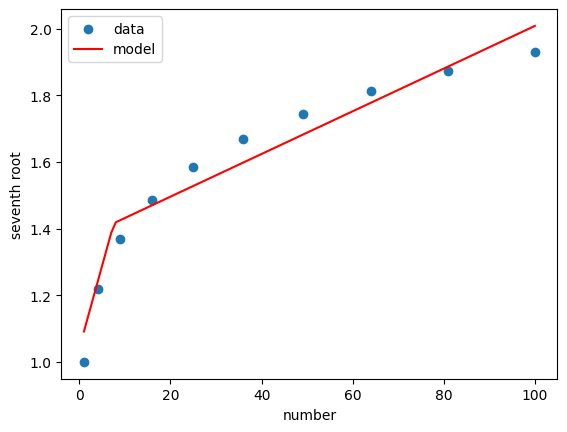

In [9]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Load dataset
#split into input (X) and output (y)
X = np.array([[1], [4], [9], [16], [25], [36], [49], [64], [81], [100]])
X = X*1.0
y = np.array([[1**(1/7)], [4**(1/7)], [9**(1/7)], [16**(1/7)], [25**(1/7)], [36**(1/7)], [49**(1/7)], [64**(1/7)], [81**(1/7)], [100**(1/7)]])
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.01)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('seventh root')
plt.legend()

**Problem 6**

In [10]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

%notebook inline
import matplotlib.pyplot as plt

X = iris.data[:, :2] # only selecting sepal length features
y = iris.data[:, 2] # only selecting the petal length

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    )

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=2,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220 (884.00 B)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[5.1, 3.5] => 1.76 (expected 1.40)
[4.9, 3.0] => 2.21 (expected 1.40)
[4.7, 3.2] => 1.35 (expected 1.30)
[4.6, 3.1] => 1.30 (expected 1.50)
[5.0, 3.6] => 1.33 (expected 1.40)
[5.4, 3.9] => 1.74 (expected 1.70)
[4.6, 3.4] => 0.74 (expected 1.40)
[5.0, 3.4] => 1.71 (expected 1.50)
[4.4, 2.9] => 1.19 (expected 1.40)
[4.9, 3.1] => 2.02 (expected 1.50)


<ipython-input-10-6091f45372c7>:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


Predictions vs. actual

In [11]:
preds = model.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[4.9581237 ]
 [5.4737587 ]
 [5.0593176 ]
 [3.9048178 ]
 [1.0898397 ]
 [4.6410103 ]
 [4.9600563 ]
 [0.62819797]
 [1.189064  ]
 [4.124408  ]
 [5.5768876 ]
 [1.4194624 ]
 [3.4981148 ]
 [5.1614795 ]
 [6.410603  ]
 [5.1614795 ]
 [2.7281487 ]
 [0.7602165 ]
 [4.746071  ]
 [1.9696786 ]
 [2.1894264 ]
 [4.9552245 ]
 [1.2218575 ]
 [4.745104  ]
 [1.1997135 ]
 [2.6732128 ]
 [2.6732128 ]
 [4.226568  ]
 [6.40287   ]
 [1.3317306 ]
 [6.1002545 ]
 [4.6487417 ]
 [1.3538749 ]
 [1.7605791 ]
 [4.6487417 ]
 [3.6068392 ]
 [6.6110587 ]
 [1.738436  ]
 [1.738436  ]
 [4.435722  ]
 [3.6097383 ]
 [2.0795524 ]
 [5.471827  ]
 [5.3696656 ]
 [4.435722  ]
 [4.434756  ]
 [4.850245  ]
 [4.127307  ]
 [1.1997135 ]
 [1.0021093 ]
 [5.159546  ]
 [2.1344907 ]
 [2.0246162 ]
 [5.3686996 ]
 [4.745104  ]
 [4.1253743 ]
 [4.3325944 ]
 [4.435722  ]
 [5.3686996 ]
 [5.0554523 ]]
actual iris species
[4.9 5.5 5.6 4.1 1.4 4.8 4.4 1.3 1.4 4.4 5.1 1.4 3.9 5.5 6.1 5.8 1.3 1.1
 4.7 1.4 1.4 5.1 1.9 4.9 1.6

Mean squared error as a measure of accuracy

In [12]:
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_test, model.predict(X_test) )
print('mean squared error :', acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
mean squared error : 0.26777864302504234
